## Donald Trump insulting Tweets 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('trump_insult_tweets_2014_to_2021.csv', index_col=False)
df

,sr no,date,target,insult,tweet
0,1,09-10-2014,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,09-10-2014,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,16-06-2015,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,24-06-2015,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,24-06-2015,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."
...,...,...,...,...,...
10355,10356,06-01-2021,2020-election,Many States want to decertify the mistake they...,If Vice President @Mike_Pence comes through fo...
10356,10357,06-01-2021,2020-election,"based on irregularities and fraud, plus corrup...","States want to correct their votes, which they..."
10357,10358,06-01-2021,2020-election,Our Election Process is worse than that of thi...,"They just happened to find 50,000 ballots late..."
10358,10359,06-01-2021,2020-election,a FRAUD,The States want to redo their votes. They foun...


### Cleaning our data-set

In [3]:
#df.drop("Unnamed: 0",axis=1, inplace=True)

In [4]:
df[df.isnull().any(axis=1)]

,sr no,date,target,insult,tweet
2533,2534,31-03-2017,NaN,a witch hunt,Mike Flynn should ask for immunity in that thi...
7439,7440,08-12-2019,NaN,Fake News,I got NATO countries to pay 530 Billion Dollar...


In [5]:
df = df.dropna(axis=0, how='any')

### In which year did Donald Trump post the most tweets? 

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.head()

,sr no,date,target,insult,tweet,month,year
0,1,2014-09-10,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ...",9,2014
1,2,2014-09-10,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ...",9,2014
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...,6,2015
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...,6,2015
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily...",6,2015


In [8]:
hot = pd.DataFrame(df.groupby(['year', 'month']).count()['tweet'].reset_index())
hot

,year,month,tweet
0,2014,9,2
1,2015,1,14
2,2015,2,15
3,2015,3,18
4,2015,4,7
...,...,...,...
74,2021,2,1
75,2021,3,7
76,2021,4,3
77,2021,5,4


### Visualization of the tweets over the years 

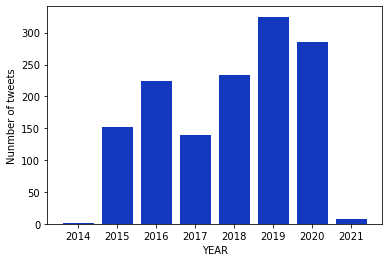

In [9]:
plt.bar(hot['year'], hot['tweet'], color= '#1338BE')
plt.xlabel('YEAR', size= 10)
plt.ylabel('Nunmber of tweets', size = 10)
plt.show()
#IN 2020 DONALD TRUMP POST THE MOST TWEETS MAYBE BCOZ OF THE ELECTIONS.

### IN 2020 , IN WHICH MONTH DID DONALD TRUMP POST THE MOST TWEETS? 

In [10]:
new_df = df.loc[df['year']==2020]
new_df = new_df.groupby('month').count()['tweet']
new_df

month
1     227
2     237
3     148
4     181
5     241
6     197
7     189
8     257
9     241
10    286
11    244
12    264
Name: tweet, dtype: int64

### Visualization for indicating the months of 2020 regarding tweets

Text(0.5, 0, 'Months of 2020')

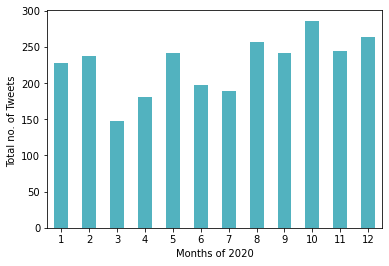

In [11]:
ax = new_df.plot(kind ='bar',color='#52b2bf')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_ylabel('Total no. of Tweets ')
ax.set_xlabel("Months of 2020")

### Who did Donald Trump target the most?

In [12]:
target = pd.DataFrame(df.groupby(['target']).count()['tweet'].sort_values(ascending=False)).head()
target

,tweet
target,
the-media,1287
democrats,647
hillary-clinton,625
trump-russia,441
joe-biden,402


Text(0.5, 0, 'Targets')

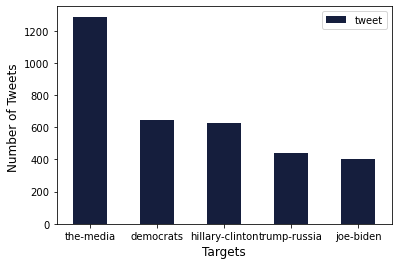

In [13]:
ax1 = target.plot(kind='bar',color='#151e3d')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 0)
ax1.set_ylabel('Number of Tweets ', size=12)
ax1.set_xlabel("Targets", size=12)

### Which insults did Donald Trump use the most frequently?

In [14]:
insult = df['insult'].value_counts().head(25)
insult

Fake News               430
Crooked                 266
Sleepy Joe              129
failing                  82
Crooked Hillary          77
Witch Hunt               76
Fake News Media          71
Do Nothing Democrats     57
FAKE NEWS                52
Impeachment Hoax         43
dishonest                35
Failing                  35
Mini Mike                34
Lamestream Media         33
Corrupt                  31
Fake                     31
phony                    29
Fake News!               28
Sleepy Joe Biden         26
Witch Hunt!              26
corrupt                  26
Crazy Nancy              25
Crazy Bernie             24
MSDNC                    23
Sad!                     22
Name: insult, dtype: int64

Text(0.5, 0, 'INSULTS')

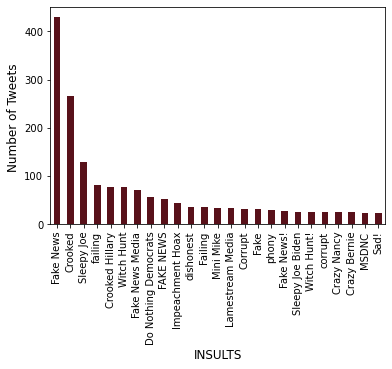

In [15]:
ax2=insult.plot(kind= 'bar', color='#58111a')
ax2.set_xticklabels(ax2.get_xticklabels())
ax2.set_ylabel('Number of Tweets ', size=12)
ax2.set_xlabel("INSULTS", size=12)

### It explains well from the previous analysis that Donald trump targeted the media most over Tweets, so he used "FAKE NEWS" the most as an insult 

### What did and how many tweets did Donald Trump post on the first of new year? 

In [16]:
new_year= df.loc[df['date'] == '2021-01-01']
new_year

,sr no,date,target,insult,tweet,month,year
10333,10334,2021-01-01,john-thune,RINO,I hope to see the great Governor of South Dako...,1,2021
10334,10335,2021-01-01,2020-election,fraudulent,Sen. Josh Hawley Slams Walmart Tweet Calling H...,1,2021
10335,10336,2021-01-01,2020-election,massive corruption,Before even discussing the massive corruption ...,1,2021
10336,10337,2021-01-01,2020-election,millions of fraudulent votes,"....is therefore both illegal and invalid, and...",1,2021
10337,10338,2021-01-01,2020-election,not legal or Constitutional,"....changes made to the voting process, rules ...",1,2021
10338,10339,2021-01-01,fox-news,@FoxNews Weekend Daytime is not watchable,.@FoxNews Weekend Daytime is not watchable. Sw...,1,2021


In [17]:
pd.DataFrame(new_year.value_counts())

,,,,,,,0
sr no,date,target,insult,tweet,month,year,
10339,2021-01-01,fox-news,@FoxNews Weekend Daytime is not watchable,.@FoxNews Weekend Daytime is not watchable. Switching over to @OANN!,1,2021,1
10338,2021-01-01,2020-election,not legal or Constitutional,"....changes made to the voting process, rules and regulations, many made hastily before the election, and therefore the whole State Election is not legal or Constitutional. Additionally, the Georgia Consent Decree is Unconstitutional & the State 2020 Presidential Election....",1,2021,1
10337,2021-01-01,2020-election,millions of fraudulent votes,"....is therefore both illegal and invalid, and that would include the two current Senatorial Elections. In Wisconsin, Voters not asking for applications invalidates the Election. All of this without even discussing the millions of fraudulent votes that were cast or altered!",1,2021,1
10336,2021-01-01,2020-election,massive corruption,"Before even discussing the massive corruption which took place in the 2020 Election, which gives us far more votes than is necessary to win all of the Swing States (only need three), it must be noted that the State Legislatures were not in any way responsible for the massive....",1,2021,1
10335,2021-01-01,2020-election,fraudulent,Sen. Josh Hawley Slams Walmart Tweet Calling Him a ‘Sore Loser‘ https://t.co/wmShnPcrzj via @BreitbartNews America is proud of Josh and the many others who are joining him. The USA cannot have fraudulent elections!,1,2021,1
10334,2021-01-01,john-thune,RINO,"I hope to see the great Governor of South Dakota @KristiNoem, run against RINO @SenJohnThune, in the upcoming 2022 Primary. She would do a fantastic job in the U.S. Senate, but if not Kristi, others are already lining up. South Dakota wants strong leadership, NOW!",1,2021,1


In [18]:
new_year.count()['tweet']

6